In [146]:
#simulation of AR(2) model from the Ding paper

In [147]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk

In [148]:
seed(1)
l = 1000
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesX = Series(series)

seed(3)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesXtest = Series(series)

In [149]:
seed(2)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesY = Series(series)

In [150]:
#check that noise is white, we want mean = 0
#print(seriesX.describe())
#print(seriesY.describe())

In [151]:
X = np.zeros((l,1))
Xtest = np.zeros((l,1))
Y = np.zeros((l,1))
for i in range(l):
    X[i] = .9*X[i-1] - .5*X[i-2] + eSeriesX[i]
    #Xtest[i] = .9*Xtest[i-1] - .5*Xtest[i-2] + eSeriesXtest[i] #Don't really need cause we know parameters

    Y[i] = .8*Y[i-1] - .5*Y[i-2] + .16*X[i-1] - .2*X[i-2] + eSeriesY[i]
    

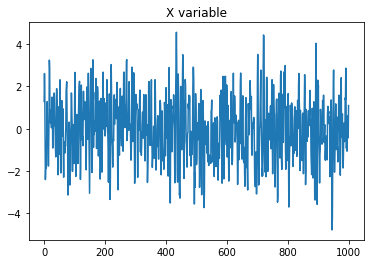

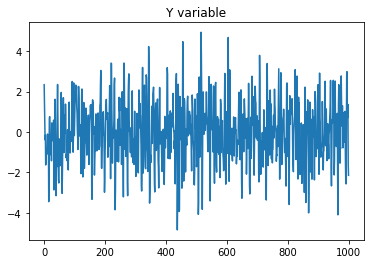

In [152]:
plt.title("X variable")
plt.plot(X)
plt.show()

plt.title("Y variable")
plt.plot(Y)
plt.show()

#plt.title("X test variable")
#plt.plot(Xtest)
#plt.show()

In [153]:
############# Let's try to solve the X series with a memory of p = 8 ##############

In [156]:
c = np.ones((l,1))

X1 = np.roll(X,1)
X1[0] = 0
X2 = np.roll(X1,1)
X2[0] = 0

Y1 = np.roll(Y,1)
Y1[0] = 0

Y2 = np.roll(Y1,1)
Y2[0] = 0

Ax = np.hstack((X1,X2,c))
Ay = np.hstack((X1,X2,Y1,Y2,c))

In [155]:
#Solving the X channel in AR(2)
ols = Ridge(alpha=0)
ols.fit(Ax,X)
ols.coef_

array([[ 0.90051586, -0.51713069,  0.        ]])

In [157]:
#Solving the Y channel in AR(2)
olsY = Ridge(alpha=0)
olsY.fit(Ay,Y)
olsY.coef_

array([[ 0.16179645, -0.2013762 ,  0.83499672, -0.52041359,  0.        ]])